In [1]:
#Importing Libraries 
import pandas as pd 
import numpy as np
import os 
import pydicom
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
from pydicom import dcmread
import glob
import rotatedicom

['/Users/elmer/Documents/quibim/T1_3D_TFE - 301\\IM-0001-0035-0001.dcm', '/Users/elmer/Documents/quibim/T1_3D_TFE - 301\\IM-0001-0086-0001.dcm']
[-112.26222546026, -125.63350227847, 12.6385438488796]


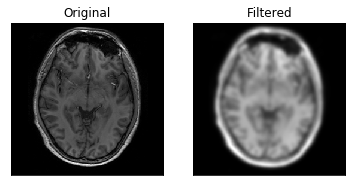

In [2]:
#Filtering Image 
print(glob.glob("/Users/elmer/Documents/quibim/T1_3D_TFE - 301/*.dcm")) #Change Path
ds = dcmread('IM-0001-0035-0001.dcm') #Change out file name for subsequent image 
type(ds.PixelData)
len(ds.PixelData)
array = ds.pixel_array
array.shape
np.savetxt('Original.txt', array)
sigma = 3
Gaus = gaussian_filter(array,sigma)
plt.subplot(121),plt.imshow(array),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.gray()
plt.subplot(122),plt.imshow(Gaus),plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.gray()
ipp_filter = ds.ImagePositionPatient
print(ipp_filter)
np.savetxt('IPP.txt', ipp_filter)

[-111.27388937398, -126.78946712985, 78.9210917996242]


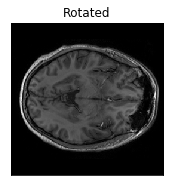

In [7]:
#Rotating Image 
ds_rot = dcmread('IM-0001-0086-0001.dcm') #Change out file name for subsequent image 
type(ds.PixelData)
len(ds.PixelData)
angle = -1 #1=90,2=180,3=270, 4=360
array_rotate = ds.pixel_array
array_rotate.shape
np.savetxt('Original.txt', array_rotate)
rotated = np.rot90(array_rotate,angle, (0,1))
plt.subplot(121),plt.imshow(rotated),plt.title('Rotated')
plt.xticks([]), plt.yticks([])
ipp_rotate = ds_rot.ImagePositionPatient
print(ipp_rotate)
np.savetxt('IPP_rot.txt', ipp_rotate)

In [8]:
#Comparing IPP
print(np.array_equal(ipp_filter,ipp_rotate))

False
